In [2]:
import sys
sys.path.append("..") # Adds higher directory to python modules path.

import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from models.Loader import load_model
from utils.shap_tools import ChronoSHAP, get_model_args
from models.Wrappers import Transformer_wrapper, Reduced_transformer_wrapper, Reduced_io_transformer_wrapper, Reduced_o_DLinear_wrapper
from torch.autograd import Variable
from cycler import cycler

import os
import torch
import numpy as np

import shap
import pickle
import warnings

from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error


%matplotlib qt5 
%matplotlib inline



In [2]:
# Load models args every analyzed dataset and model
transf_model_args, autof_model_args, dl_model_args, nl_model_args = get_model_args()



In [ ]:
reduced_deep_shap_values = []

for pred_hor in range(reduced_io_wrapped_model.pred_len):
    print("Analyzing time step ",pred_hor)
    reduced_io_wrapped_model.set_pred_time_step(pred_hor)
    reduced_deep_shap_values.append(e.shap_values(reduced_new_input))

In [3]:
# Transformers
for dataset_key in ["ETTh1"]:
    exp, model, setting = load_model(transf_model_args[dataset_key], load=True, return_copy=False)
    pred_data, pred_loader = exp._get_data("pred")

    num_train_samples = 50
    
    feature_list = []
    for i in range(exp.args.c_out*exp.args.seq_len):
        feature_list.append("Feature {}, seq pos {} ".format(pred_data.cols[1:][i%exp.args.c_out], int(i/exp.args.c_out)))
    
#     Load saved shap-based explanations
    with open("Explanations/SHAP/shap_values_{}_in_{}_out_{}_{}_bg_{}.pkl".format(dataset_key, exp.args.seq_len, exp.args.pred_len, exp.args.model, num_train_samples), 'rb') as file:
        reduced_deep_shap_values = pickle.load(file)
    
    signals = np.asarray(reduced_deep_shap_values)
    

Arg use_gpu initial: True
Args in experiment:
Namespace(activation='gelu', batch_size=32, c_out=7, checkpoints='F:\\Transformers old results\\checkpoints', d_ff=2048, d_layers=1, d_model=512, data='ETTh1', data_path='ETTh1.csv', dec_in=7, des='Exp', devices='0,1,2,3', distil=True, do_predict=False, dropout=0.05, e_layers=2, embed='timeF', embed_type=0, enc_in=7, factor=3, features='M', freq='h', gpu=0, individual=False, is_training=1, itr=1, label_len=48, learning_rate=0.0001, loss='mse', lradj='type1', model='Transformer', model_id='ETTh1_96', moving_avg=25, n_heads=8, num_workers=0, output_attention=False, patience=3, pred_len=96, root_path='./dataset/', save_pred_values=False, seed=12890, seq_len=96, target='OT', test_flop=False, train_epochs=10, train_only=False, use_amp=False, use_gpu=True, use_multi_gpu=False)
Use GPU: cuda:0
F:\Transformers old results\checkpoints/ETTh1_96_Transformer_ETTh1_ftM_sl96_ll48_pl96_dm512_nh8_el2_dl1_df2048_fc3_ebtimeF_dtTrue_Exp_0_seed12890/checkpoint

In [16]:
exp.args.c_out

7

In [19]:
signals = np.asarray(reduced_deep_shap_values)
print(signals.shape)

signals = signals.squeeze()
print(np.asarray(reduced_deep_shap_values).reshape((signals.shape[0], signals.shape[1], exp.args.seq_len, exp.args.c_out)).shape)

(96, 7, 1, 672)
(96, 7, 96, 7)


In [7]:
signals = np.asarray(reduced_deep_shap_values).squeeze()

In [8]:
signals.shape

(96, 7, 672)

Arg use_gpu initial: True
Args in experiment:
Namespace(activation='gelu', batch_size=32, c_out=8, checkpoints='F:\\Transformers old results\\checkpoints', d_ff=2048, d_layers=1, d_model=512, data='custom', data_path='exchange_rate.csv', dec_in=8, des='Exp', devices='0,1,2,3', distil=True, do_predict=False, dropout=0.05, e_layers=2, embed='timeF', embed_type=0, enc_in=8, factor=3, features='M', freq='h', gpu=0, individual=False, is_training=1, itr=1, label_len=48, learning_rate=0.0001, loss='mse', lradj='type1', model='Transformer', model_id='exchange_96', moving_avg=25, n_heads=8, num_workers=0, output_attention=False, patience=3, pred_len=96, root_path='./dataset/', save_pred_values=False, seed=10458, seq_len=96, target='OT', test_flop=False, train_epochs=10, train_only=False, use_amp=False, use_gpu=True, use_multi_gpu=False)
Use GPU: cuda:0
F:\Transformers old results\checkpoints/exchange_96_Transformer_custom_ftM_sl96_ll48_pl96_dm512_nh8_el2_dl1_df2048_fc3_ebtimeF_dtTrue_Exp_0_seed

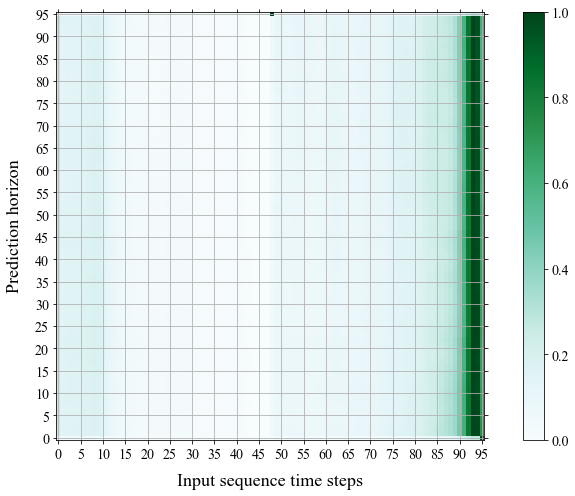

Arg use_gpu initial: True
Args in experiment:
Namespace(activation='gelu', batch_size=32, c_out=7, checkpoints='F:\\Transformers old results\\checkpoints', d_ff=2048, d_layers=1, d_model=512, data='ETTh1', data_path='ETTh1.csv', dec_in=7, des='Exp', devices='0,1,2,3', distil=True, do_predict=False, dropout=0.05, e_layers=2, embed='timeF', embed_type=0, enc_in=7, factor=3, features='M', freq='h', gpu=0, individual=False, is_training=1, itr=1, label_len=48, learning_rate=0.0001, loss='mse', lradj='type1', model='Transformer', model_id='ETTh1_96', moving_avg=25, n_heads=8, num_workers=0, output_attention=False, patience=3, pred_len=96, root_path='./dataset/', save_pred_values=False, seed=12890, seq_len=96, target='OT', test_flop=False, train_epochs=10, train_only=False, use_amp=False, use_gpu=True, use_multi_gpu=False)
Use GPU: cuda:0
F:\Transformers old results\checkpoints/ETTh1_96_Transformer_ETTh1_ftM_sl96_ll48_pl96_dm512_nh8_el2_dl1_df2048_fc3_ebtimeF_dtTrue_Exp_0_seed12890/checkpoint

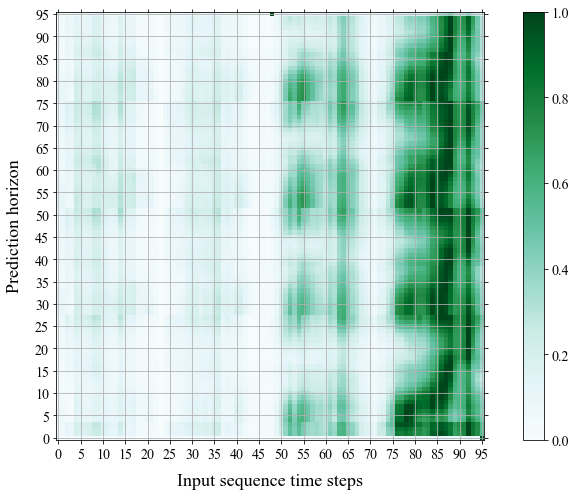

Arg use_gpu initial: True
Args in experiment:
Namespace(activation='gelu', batch_size=32, c_out=7, checkpoints='F:\\Transformers old results\\checkpoints', d_ff=2048, d_layers=1, d_model=512, data='ETTh2', data_path='ETTh2.csv', dec_in=7, des='Exp', devices='0,1,2,3', distil=True, do_predict=False, dropout=0.05, e_layers=2, embed='timeF', embed_type=0, enc_in=7, factor=3, features='M', freq='h', gpu=0, individual=False, is_training=1, itr=1, label_len=48, learning_rate=0.0001, loss='mse', lradj='type1', model='Transformer', model_id='ETTh2_96', moving_avg=25, n_heads=8, num_workers=0, output_attention=False, patience=3, pred_len=96, root_path='./dataset/', save_pred_values=False, seed=25565, seq_len=96, target='OT', test_flop=False, train_epochs=10, train_only=False, use_amp=False, use_gpu=True, use_multi_gpu=False)
Use GPU: cuda:0
F:\Transformers old results\checkpoints/ETTh2_96_Transformer_ETTh2_ftM_sl96_ll48_pl96_dm512_nh8_el2_dl1_df2048_fc3_ebtimeF_dtTrue_Exp_0_seed25565/checkpoint

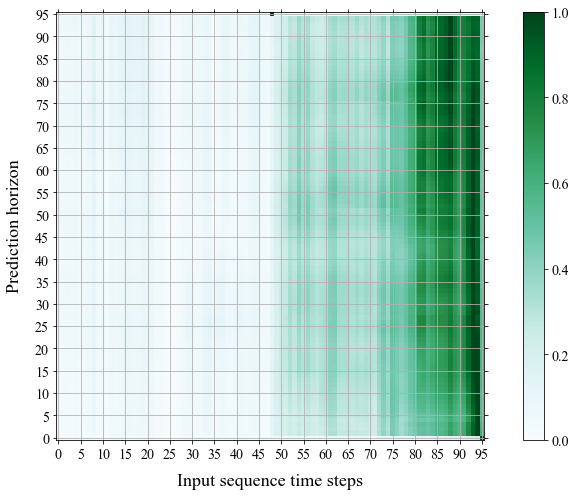

Arg use_gpu initial: True
Args in experiment:
Namespace(activation='gelu', batch_size=32, c_out=7, checkpoints='F:\\Transformers old results\\checkpoints', d_ff=2048, d_layers=1, d_model=512, data='ETTm1', data_path='ETTm1.csv', dec_in=7, des='Exp', devices='0,1,2,3', distil=True, do_predict=False, dropout=0.05, e_layers=2, embed='timeF', embed_type=0, enc_in=7, factor=3, features='M', freq='h', gpu=0, individual=False, is_training=1, itr=1, label_len=48, learning_rate=0.0001, loss='mse', lradj='type1', model='Transformer', model_id='ETTm1_96', moving_avg=25, n_heads=8, num_workers=0, output_attention=False, patience=3, pred_len=96, root_path='./dataset/', save_pred_values=False, seed=32598, seq_len=96, target='OT', test_flop=False, train_epochs=10, train_only=False, use_amp=False, use_gpu=True, use_multi_gpu=False)
Use GPU: cuda:0
F:\Transformers old results\checkpoints/ETTm1_96_Transformer_ETTm1_ftM_sl96_ll48_pl96_dm512_nh8_el2_dl1_df2048_fc3_ebtimeF_dtTrue_Exp_0_seed32598/checkpoint

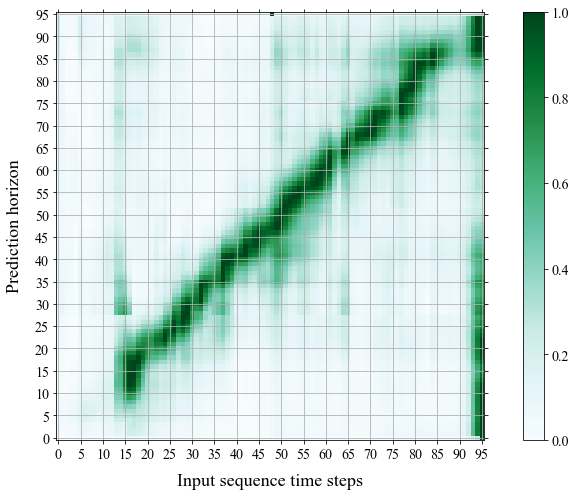

Arg use_gpu initial: True
Args in experiment:
Namespace(activation='gelu', batch_size=32, c_out=7, checkpoints='F:\\Transformers old results\\checkpoints', d_ff=2048, d_layers=1, d_model=512, data='ETTm2', data_path='ETTm2.csv', dec_in=7, des='Exp', devices='0,1,2,3', distil=True, do_predict=False, dropout=0.05, e_layers=2, embed='timeF', embed_type=0, enc_in=7, factor=3, features='M', freq='h', gpu=0, individual=False, is_training=1, itr=1, label_len=48, learning_rate=0.0001, loss='mse', lradj='type1', model='Transformer', model_id='ETTm2_96', moving_avg=25, n_heads=8, num_workers=0, output_attention=False, patience=3, pred_len=96, root_path='./dataset/', save_pred_values=False, seed=15349, seq_len=96, target='OT', test_flop=False, train_epochs=10, train_only=False, use_amp=False, use_gpu=True, use_multi_gpu=False)
Use GPU: cuda:0
F:\Transformers old results\checkpoints/ETTm2_96_Transformer_ETTm2_ftM_sl96_ll48_pl96_dm512_nh8_el2_dl1_df2048_fc3_ebtimeF_dtTrue_Exp_0_seed15349/checkpoint

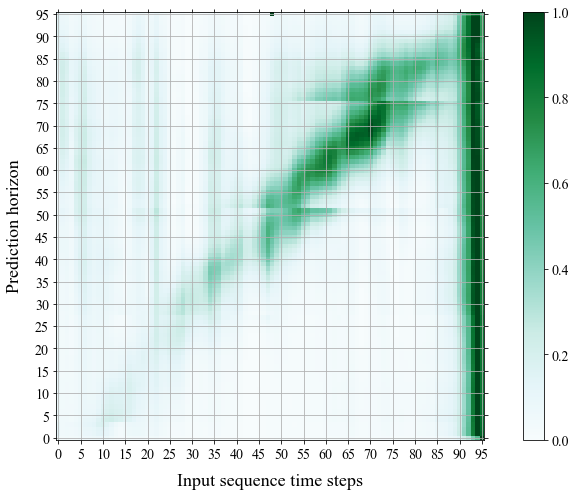

Arg use_gpu initial: True
Args in experiment:
Namespace(activation='gelu', batch_size=32, c_out=21, checkpoints='F:\\Transformers old results\\checkpoints', d_ff=2048, d_layers=1, d_model=512, data='custom', data_path='weather.csv', dec_in=21, des='Exp', devices='0,1,2,3', distil=True, do_predict=False, dropout=0.05, e_layers=2, embed='timeF', embed_type=0, enc_in=21, factor=3, features='M', freq='h', gpu=0, individual=False, is_training=1, itr=1, label_len=48, learning_rate=0.0001, loss='mse', lradj='type1', model='Transformer', model_id='weather_96', moving_avg=25, n_heads=8, num_workers=0, output_attention=False, patience=3, pred_len=96, root_path='./dataset/', save_pred_values=False, seed=15227, seq_len=96, target='OT', test_flop=False, train_epochs=10, train_only=False, use_amp=False, use_gpu=True, use_multi_gpu=False)
Use GPU: cuda:0
F:\Transformers old results\checkpoints/weather_96_Transformer_custom_ftM_sl96_ll48_pl96_dm512_nh8_el2_dl1_df2048_fc3_ebtimeF_dtTrue_Exp_0_seed15227

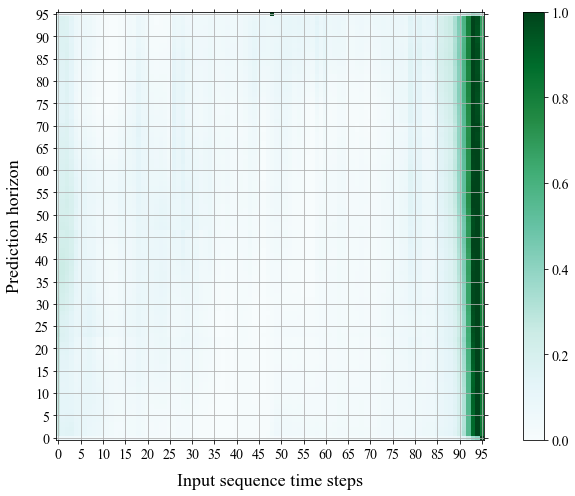

Arg use_gpu initial: True
Args in experiment:
Namespace(activation='gelu', batch_size=32, c_out=7, checkpoints='F:\\Transformers old results\\checkpoints', d_ff=2048, d_layers=1, d_model=512, data='custom', data_path='national_illness.csv', dec_in=7, des='Exp', devices='0,1,2,3', distil=True, do_predict=False, dropout=0.05, e_layers=2, embed='timeF', embed_type=0, enc_in=7, factor=3, features='M', freq='h', gpu=0, individual=False, is_training=1, itr=1, label_len=18, learning_rate=0.0001, loss='mse', lradj='type1', model='Transformer', model_id='ili_36', moving_avg=25, n_heads=8, num_workers=0, output_attention=False, patience=3, pred_len=36, root_path='./dataset/', save_pred_values=False, seed=3144, seq_len=36, target='OT', test_flop=False, train_epochs=10, train_only=False, use_amp=False, use_gpu=True, use_multi_gpu=False)
Use GPU: cuda:0
F:\Transformers old results\checkpoints/ili_36_Transformer_custom_ftM_sl36_ll18_pl36_dm512_nh8_el2_dl1_df2048_fc3_ebtimeF_dtTrue_Exp_0_seed3144/che

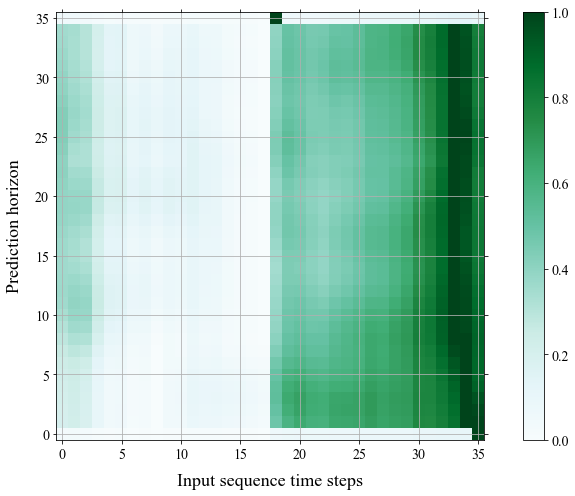

In [3]:
# Transformers
for dataset_key in ["exchange_rate", "ETTh1", "ETTh2", "ETTm1", "ETTm2", "weather", "national_illness"]:
    exp, model, setting = load_model(transf_model_args[dataset_key], load=True, return_copy=False)
    pred_data, pred_loader = exp._get_data("pred")

#     Load some params needed to identify saved explanations
    if dataset_key == "national_illness":
        num_train_samples = 576
    else:
        num_train_samples = 50
    
    feature_list = []
    for i in range(exp.args.c_out*exp.args.seq_len):
        feature_list.append("Feature {}, seq pos {} ".format(pred_data.cols[1:][i%exp.args.c_out], int(i/exp.args.c_out)))
    
#     Load saved shap-based explanations
    with open("Explanations/SHAP/shap_values_{}_in_{}_out_{}_{}_bg_{}.pkl".format(dataset_key, exp.args.seq_len, exp.args.pred_len, exp.args.model, num_train_samples), 'rb') as file:
        reduced_deep_shap_values = pickle.load(file)
        
    custom_cycler = (cycler(color=plt.rcParams['axes.prop_cycle'].by_key()['color'][:8]) + 
                 cycler(linestyle=['dotted', 'dashed', 'dashdot', (0, (3, 5, 1, 5, 1, 5)), 
                                   (5, (10, 3)), (0, (5, 10)), (0, (5, 5)), (0, (5, 1))]))
    plt.rc('axes', prop_cycle=custom_cycler)

    pred_hor = 0
    out_feat = 0
    mode = 1
    path = "figures"
    fig_name = "\\shap_overview_{}_in_{}_out_{}_{}_bg_{}.pdf".format(dataset_key, exp.args.seq_len, exp.args.pred_len, exp.args.model, num_train_samples)
    figsize = (11,7)
    save = 1

    ChronoSHAP(reduced_deep_shap_values, exp.args.seq_len, 
                           exp.args.c_out, pred_data.cols[1:], mode, pred_hor, out_feat, grid=1, save=save, path=path+fig_name, figsize=figsize)

Arg use_gpu initial: True
Args in experiment:
Namespace(activation='gelu', batch_size=32, c_out=8, checkpoints='F:\\Transformers old results\\checkpoints', d_ff=2048, d_layers=1, d_model=512, data='custom', data_path='exchange_rate.csv', dec_in=8, des='Exp', devices='0,1,2,3', distil=True, do_predict=False, dropout=0.05, e_layers=2, embed='timeF', embed_type=0, enc_in=8, factor=3, features='M', freq='h', gpu=0, individual=False, is_training=1, itr=1, label_len=48, learning_rate=0.0001, loss='mse', lradj='type1', model='Autoformer', model_id='exchange_96', moving_avg=25, n_heads=8, num_workers=0, output_attention=False, patience=3, pred_len=96, root_path='./dataset/', save_pred_values=False, seed=15726, seq_len=96, target='OT', test_flop=False, train_epochs=10, train_only=False, use_amp=False, use_gpu=True, use_multi_gpu=False)
Use GPU: cuda:0
F:\Transformers old results\checkpoints/exchange_96_Autoformer_custom_ftM_sl96_ll48_pl96_dm512_nh8_el2_dl1_df2048_fc3_ebtimeF_dtTrue_Exp_0_seed15

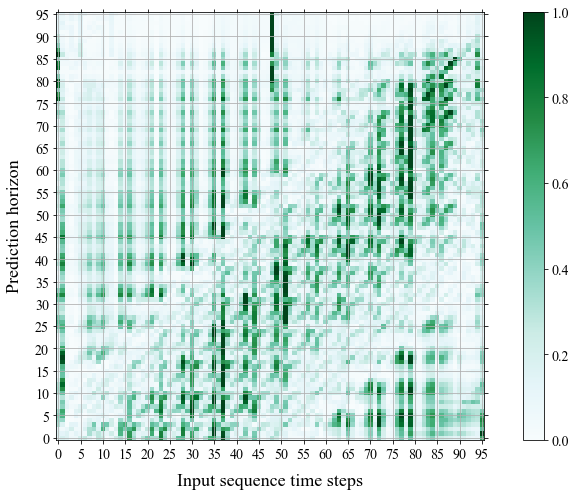

Arg use_gpu initial: True
Args in experiment:
Namespace(activation='gelu', batch_size=32, c_out=7, checkpoints='F:\\Transformers old results\\checkpoints', d_ff=2048, d_layers=1, d_model=512, data='ETTh1', data_path='ETTh1.csv', dec_in=7, des='Exp', devices='0,1,2,3', distil=True, do_predict=False, dropout=0.05, e_layers=2, embed='timeF', embed_type=0, enc_in=7, factor=3, features='M', freq='h', gpu=0, individual=False, is_training=1, itr=1, label_len=48, learning_rate=0.0001, loss='mse', lradj='type1', model='Autoformer', model_id='ETTh1_96', moving_avg=25, n_heads=8, num_workers=0, output_attention=False, patience=3, pred_len=96, root_path='./dataset/', save_pred_values=False, seed=10458, seq_len=96, target='OT', test_flop=False, train_epochs=10, train_only=False, use_amp=False, use_gpu=True, use_multi_gpu=False)
Use GPU: cuda:0
F:\Transformers old results\checkpoints/ETTh1_96_Autoformer_ETTh1_ftM_sl96_ll48_pl96_dm512_nh8_el2_dl1_df2048_fc3_ebtimeF_dtTrue_Exp_0_seed10458/checkpoint.p

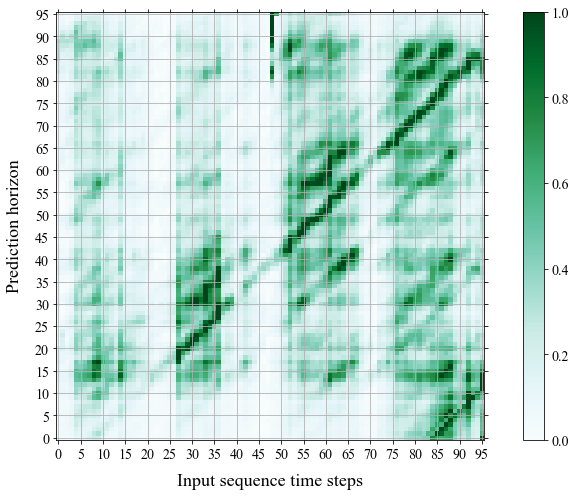

Arg use_gpu initial: True
Args in experiment:
Namespace(activation='gelu', batch_size=32, c_out=7, checkpoints='F:\\Transformers old results\\checkpoints', d_ff=2048, d_layers=1, d_model=512, data='ETTh2', data_path='ETTh2.csv', dec_in=7, des='Exp', devices='0,1,2,3', distil=True, do_predict=False, dropout=0.05, e_layers=2, embed='timeF', embed_type=0, enc_in=7, factor=3, features='M', freq='h', gpu=0, individual=False, is_training=1, itr=1, label_len=48, learning_rate=0.0001, loss='mse', lradj='type1', model='Autoformer', model_id='ETTh2_96', moving_avg=25, n_heads=8, num_workers=0, output_attention=False, patience=3, pred_len=96, root_path='./dataset/', save_pred_values=False, seed=25565, seq_len=96, target='OT', test_flop=False, train_epochs=10, train_only=False, use_amp=False, use_gpu=True, use_multi_gpu=False)
Use GPU: cuda:0
F:\Transformers old results\checkpoints/ETTh2_96_Autoformer_ETTh2_ftM_sl96_ll48_pl96_dm512_nh8_el2_dl1_df2048_fc3_ebtimeF_dtTrue_Exp_0_seed25565/checkpoint.p

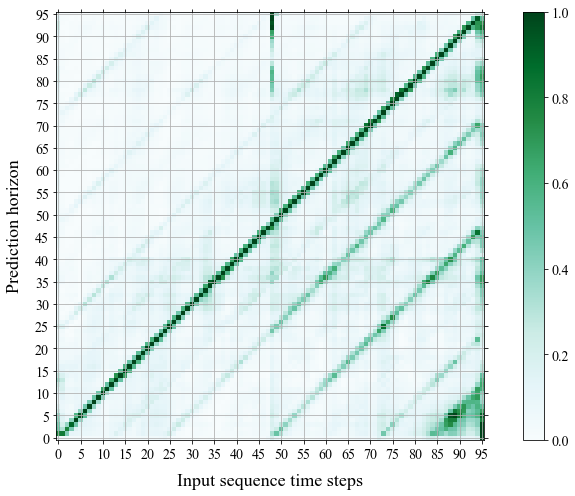

Arg use_gpu initial: True
Args in experiment:
Namespace(activation='gelu', batch_size=32, c_out=7, checkpoints='F:\\Transformers old results\\checkpoints', d_ff=2048, d_layers=1, d_model=512, data='ETTm1', data_path='ETTm1.csv', dec_in=7, des='Exp', devices='0,1,2,3', distil=True, do_predict=False, dropout=0.05, e_layers=2, embed='timeF', embed_type=0, enc_in=7, factor=3, features='M', freq='h', gpu=0, individual=False, is_training=1, itr=1, label_len=48, learning_rate=0.0001, loss='mse', lradj='type1', model='Autoformer', model_id='ETTm1_96', moving_avg=25, n_heads=8, num_workers=0, output_attention=False, patience=3, pred_len=96, root_path='./dataset/', save_pred_values=False, seed=10458, seq_len=96, target='OT', test_flop=False, train_epochs=10, train_only=False, use_amp=False, use_gpu=True, use_multi_gpu=False)
Use GPU: cuda:0
F:\Transformers old results\checkpoints/ETTm1_96_Autoformer_ETTm1_ftM_sl96_ll48_pl96_dm512_nh8_el2_dl1_df2048_fc3_ebtimeF_dtTrue_Exp_0_seed10458/checkpoint.p

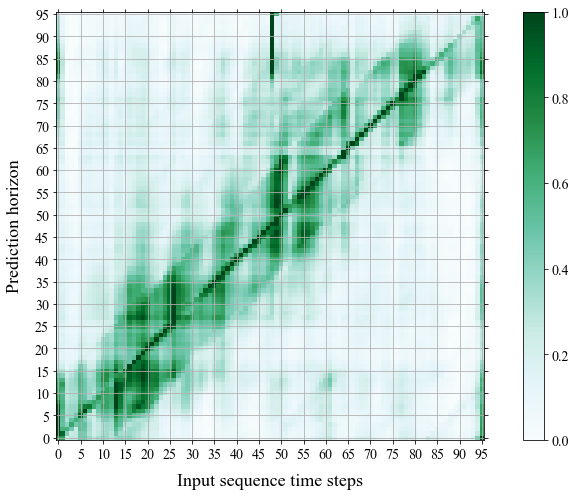

Arg use_gpu initial: True
Args in experiment:
Namespace(activation='gelu', batch_size=32, c_out=7, checkpoints='F:\\Transformers old results\\checkpoints', d_ff=2048, d_layers=1, d_model=512, data='ETTm2', data_path='ETTm2.csv', dec_in=7, des='Exp', devices='0,1,2,3', distil=True, do_predict=False, dropout=0.05, e_layers=2, embed='timeF', embed_type=0, enc_in=7, factor=3, features='M', freq='h', gpu=0, individual=False, is_training=1, itr=1, label_len=48, learning_rate=0.0001, loss='mse', lradj='type1', model='Autoformer', model_id='ETTm2_96', moving_avg=25, n_heads=8, num_workers=0, output_attention=False, patience=3, pred_len=96, root_path='./dataset/', save_pred_values=False, seed=3293, seq_len=96, target='OT', test_flop=False, train_epochs=10, train_only=False, use_amp=False, use_gpu=True, use_multi_gpu=False)
Use GPU: cuda:0
F:\Transformers old results\checkpoints/ETTm2_96_Autoformer_ETTm2_ftM_sl96_ll48_pl96_dm512_nh8_el2_dl1_df2048_fc3_ebtimeF_dtTrue_Exp_0_seed3293/checkpoint.pth

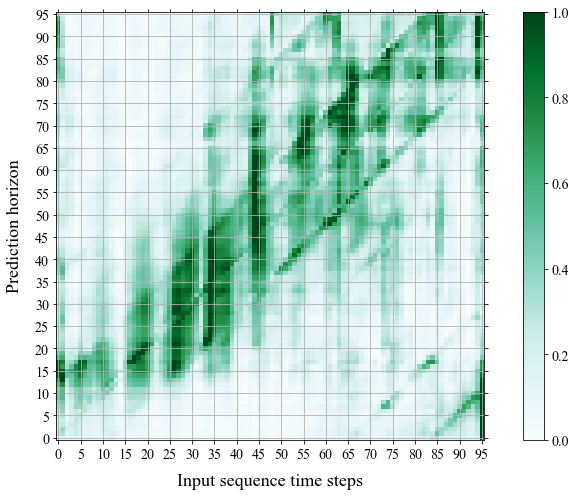

Arg use_gpu initial: True
Args in experiment:
Namespace(activation='gelu', batch_size=32, c_out=21, checkpoints='F:\\Transformers old results\\checkpoints', d_ff=2048, d_layers=1, d_model=512, data='custom', data_path='weather.csv', dec_in=21, des='Exp', devices='0,1,2,3', distil=True, do_predict=False, dropout=0.05, e_layers=2, embed='timeF', embed_type=0, enc_in=21, factor=3, features='M', freq='h', gpu=0, individual=False, is_training=1, itr=1, label_len=48, learning_rate=0.0001, loss='mse', lradj='type1', model='Autoformer', model_id='weather_96', moving_avg=25, n_heads=8, num_workers=0, output_attention=False, patience=3, pred_len=96, root_path='./dataset/', save_pred_values=False, seed=28649, seq_len=96, target='OT', test_flop=False, train_epochs=10, train_only=False, use_amp=False, use_gpu=True, use_multi_gpu=False)
Use GPU: cuda:0
F:\Transformers old results\checkpoints/weather_96_Autoformer_custom_ftM_sl96_ll48_pl96_dm512_nh8_el2_dl1_df2048_fc3_ebtimeF_dtTrue_Exp_0_seed28649/c

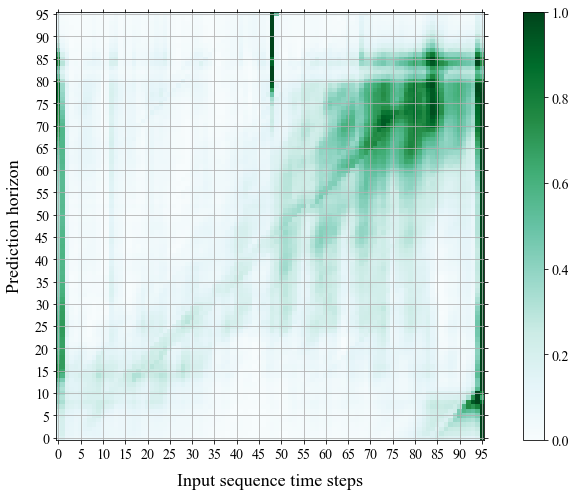

Arg use_gpu initial: True
Args in experiment:
Namespace(activation='gelu', batch_size=32, c_out=7, checkpoints='F:\\Transformers old results\\checkpoints', d_ff=2048, d_layers=1, d_model=512, data='custom', data_path='national_illness.csv', dec_in=7, des='Exp', devices='0,1,2,3', distil=True, do_predict=False, dropout=0.05, e_layers=2, embed='timeF', embed_type=0, enc_in=7, factor=3, features='M', freq='h', gpu=0, individual=False, is_training=1, itr=1, label_len=18, learning_rate=0.0001, loss='mse', lradj='type1', model='Autoformer', model_id='ili_36', moving_avg=25, n_heads=8, num_workers=0, output_attention=False, patience=3, pred_len=36, root_path='./dataset/', save_pred_values=False, seed=32598, seq_len=36, target='OT', test_flop=False, train_epochs=10, train_only=False, use_amp=False, use_gpu=True, use_multi_gpu=False)
Use GPU: cuda:0
F:\Transformers old results\checkpoints/ili_36_Autoformer_custom_ftM_sl36_ll18_pl36_dm512_nh8_el2_dl1_df2048_fc3_ebtimeF_dtTrue_Exp_0_seed32598/che

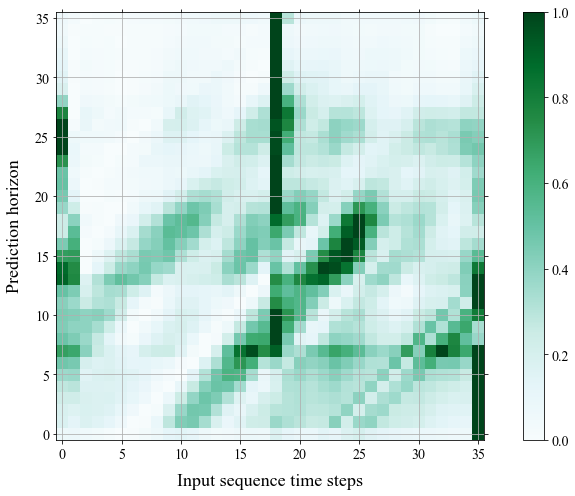

In [4]:
# Autoformers
for dataset_key in ["exchange_rate", "ETTh1", "ETTh2", "ETTm1", "ETTm2", "weather", "national_illness"]:
    exp, model, setting = load_model(autof_model_args[dataset_key], load=True, return_copy=False)
    pred_data, pred_loader = exp._get_data("pred")

#     Load some params needed to identify saved explanations
    if dataset_key == "national_illness":
        num_train_samples = 576
    else:
        num_train_samples = 50
    
    feature_list = []
    for i in range(exp.args.c_out*exp.args.seq_len):
        feature_list.append("Feature {}, seq pos {} ".format(pred_data.cols[1:][i%exp.args.c_out], int(i/exp.args.c_out)))
    
#     Load saved shap-based explanations
    with open("Explanations/SHAP/shap_values_{}_in_{}_out_{}_{}_bg_{}.pkl".format(dataset_key, exp.args.seq_len, exp.args.pred_len, exp.args.model, num_train_samples), 'rb') as file:
        reduced_deep_shap_values = pickle.load(file)
        
    custom_cycler = (cycler(color=plt.rcParams['axes.prop_cycle'].by_key()['color'][:8]) + 
                 cycler(linestyle=['dotted', 'dashed', 'dashdot', (0, (3, 5, 1, 5, 1, 5)), 
                                   (5, (10, 3)), (0, (5, 10)), (0, (5, 5)), (0, (5, 1))]))
    plt.rc('axes', prop_cycle=custom_cycler)

    pred_hor = 0
    out_feat = 0
    mode = 1
    path = "figures"
    fig_name = "\\shap_overview_{}_in_{}_out_{}_{}_bg_{}.pdf".format(dataset_key, exp.args.seq_len, exp.args.pred_len, exp.args.model, num_train_samples)
    figsize = (11,7)
    save = 1

    ChronoSHAP(reduced_deep_shap_values, exp.args.seq_len, 
                           exp.args.c_out, pred_data.cols[1:], mode, pred_hor, out_feat, grid=1, save=save, path=path+fig_name, figsize=figsize)

Arg use_gpu initial: False
Args in experiment:
Namespace(activation='gelu', batch_size=8, c_out=8, checkpoints='\\checkpoints', d_ff=2048, d_layers=1, d_model=512, data='custom', data_path='exchange_rate.csv', dec_in=7, des='Exp', devices='0,1,2,3', distil=True, do_predict=False, dropout=0.05, e_layers=2, embed='timeF', embed_type=0, enc_in=8, factor=1, features='M', freq='h', gpu=0, individual=True, is_training=1, itr=1, label_len=48, learning_rate=0.0005, loss='mse', lradj='type1', model='DLinear', model_id='exchange_96_96', moving_avg=25, n_heads=8, num_workers=0, output_attention=False, patience=5, pred_len=96, root_path='./dataset/', save_pred_values=False, seed=15349, seq_len=96, target='OT', test_flop=False, train_epochs=20, train_only=False, use_amp=False, use_gpu=False, use_multi_gpu=False)
Use CPU
checkpoints/exchange_96_96_DLinear_custom_ftM_sl96_ll48_pl96_dm512_nh8_el2_dl1_df2048_fc1_ebtimeF_dtTrue_Exp_0_seed15349/checkpoint.pth
pred 1
Input/output mode
accum_signals.shape 

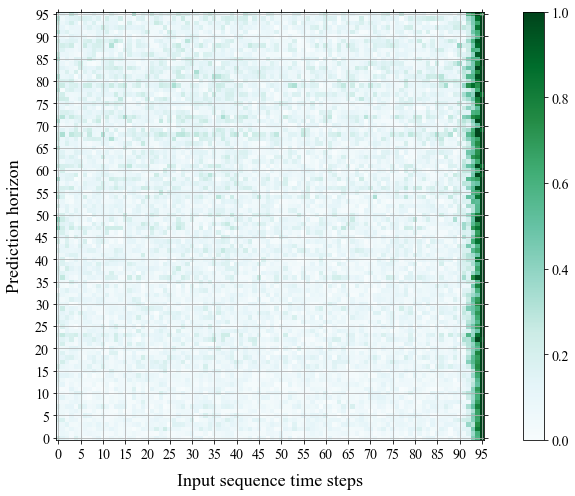

Arg use_gpu initial: False
Args in experiment:
Namespace(activation='gelu', batch_size=8, c_out=7, checkpoints='\\checkpoints', d_ff=2048, d_layers=1, d_model=512, data='ETTh1', data_path='ETTh1.csv', dec_in=7, des='Exp', devices='0,1,2,3', distil=True, do_predict=False, dropout=0.05, e_layers=2, embed='timeF', embed_type=0, enc_in=7, factor=1, features='M', freq='h', gpu=0, individual=True, is_training=1, itr=1, label_len=48, learning_rate=0.0005, loss='mse', lradj='type1', model='DLinear', model_id='ETTh1_96_96', moving_avg=25, n_heads=8, num_workers=0, output_attention=False, patience=5, pred_len=96, root_path='./dataset/', save_pred_values=False, seed=15349, seq_len=96, target='OT', test_flop=False, train_epochs=20, train_only=False, use_amp=False, use_gpu=False, use_multi_gpu=False)
Use CPU
checkpoints/ETTh1_96_96_DLinear_ETTh1_ftM_sl96_ll48_pl96_dm512_nh8_el2_dl1_df2048_fc1_ebtimeF_dtTrue_Exp_0_seed15349/checkpoint.pth
pred 1
Input/output mode
accum_signals.shape (96, 96)


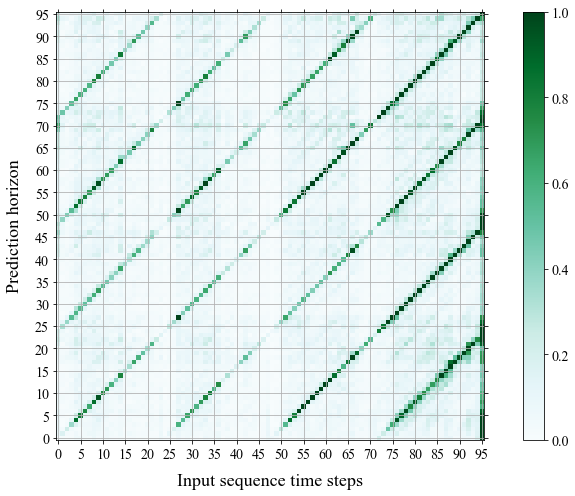

Arg use_gpu initial: False
Args in experiment:
Namespace(activation='gelu', batch_size=8, c_out=7, checkpoints='\\checkpoints', d_ff=2048, d_layers=1, d_model=512, data='ETTh2', data_path='ETTh2.csv', dec_in=7, des='Exp', devices='0,1,2,3', distil=True, do_predict=False, dropout=0.05, e_layers=2, embed='timeF', embed_type=0, enc_in=7, factor=1, features='M', freq='h', gpu=0, individual=True, is_training=1, itr=1, label_len=48, learning_rate=0.0005, loss='mse', lradj='type1', model='DLinear', model_id='ETTh2_96_96', moving_avg=25, n_heads=8, num_workers=0, output_attention=False, patience=5, pred_len=96, root_path='./dataset/', save_pred_values=False, seed=3293, seq_len=96, target='OT', test_flop=False, train_epochs=20, train_only=False, use_amp=False, use_gpu=False, use_multi_gpu=False)
Use CPU
checkpoints/ETTh2_96_96_DLinear_ETTh2_ftM_sl96_ll48_pl96_dm512_nh8_el2_dl1_df2048_fc1_ebtimeF_dtTrue_Exp_0_seed3293/checkpoint.pth
pred 1
Input/output mode
accum_signals.shape (96, 96)


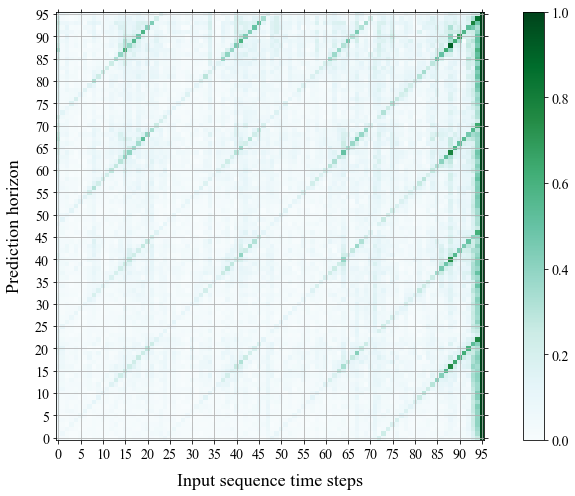

Arg use_gpu initial: False
Args in experiment:
Namespace(activation='gelu', batch_size=8, c_out=7, checkpoints='\\checkpoints', d_ff=2048, d_layers=1, d_model=512, data='ETTm1', data_path='ETTm1.csv', dec_in=7, des='Exp', devices='0,1,2,3', distil=True, do_predict=False, dropout=0.05, e_layers=2, embed='timeF', embed_type=0, enc_in=7, factor=1, features='M', freq='h', gpu=0, individual=True, is_training=1, itr=1, label_len=48, learning_rate=0.0005, loss='mse', lradj='type1', model='DLinear', model_id='ETTm1_96_96', moving_avg=25, n_heads=8, num_workers=0, output_attention=False, patience=5, pred_len=96, root_path='./dataset/', save_pred_values=False, seed=32598, seq_len=96, target='OT', test_flop=False, train_epochs=20, train_only=False, use_amp=False, use_gpu=False, use_multi_gpu=False)
Use CPU
checkpoints/ETTm1_96_96_DLinear_ETTm1_ftM_sl96_ll48_pl96_dm512_nh8_el2_dl1_df2048_fc1_ebtimeF_dtTrue_Exp_0_seed32598/checkpoint.pth
pred 1
Input/output mode
accum_signals.shape (96, 96)


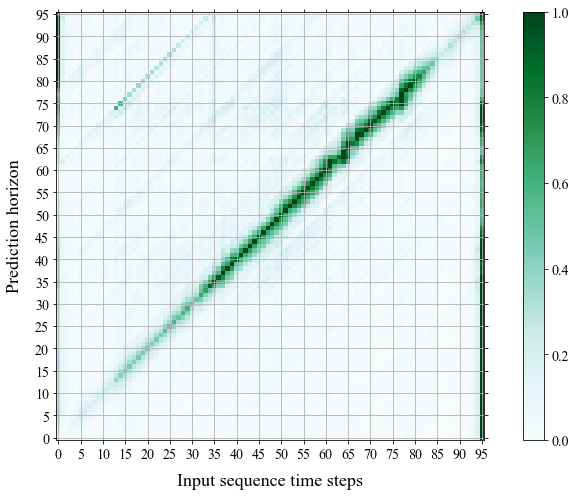

Arg use_gpu initial: False
Args in experiment:
Namespace(activation='gelu', batch_size=8, c_out=7, checkpoints='\\checkpoints', d_ff=2048, d_layers=1, d_model=512, data='ETTm2', data_path='ETTm2.csv', dec_in=7, des='Exp', devices='0,1,2,3', distil=True, do_predict=False, dropout=0.05, e_layers=2, embed='timeF', embed_type=0, enc_in=7, factor=1, features='M', freq='h', gpu=0, individual=True, is_training=1, itr=1, label_len=48, learning_rate=0.0005, loss='mse', lradj='type1', model='DLinear', model_id='ETTm2_96_96', moving_avg=25, n_heads=8, num_workers=0, output_attention=False, patience=5, pred_len=96, root_path='./dataset/', save_pred_values=False, seed=10458, seq_len=96, target='OT', test_flop=False, train_epochs=20, train_only=False, use_amp=False, use_gpu=False, use_multi_gpu=False)
Use CPU
checkpoints/ETTm2_96_96_DLinear_ETTm2_ftM_sl96_ll48_pl96_dm512_nh8_el2_dl1_df2048_fc1_ebtimeF_dtTrue_Exp_0_seed10458/checkpoint.pth
pred 1
Input/output mode
accum_signals.shape (96, 96)


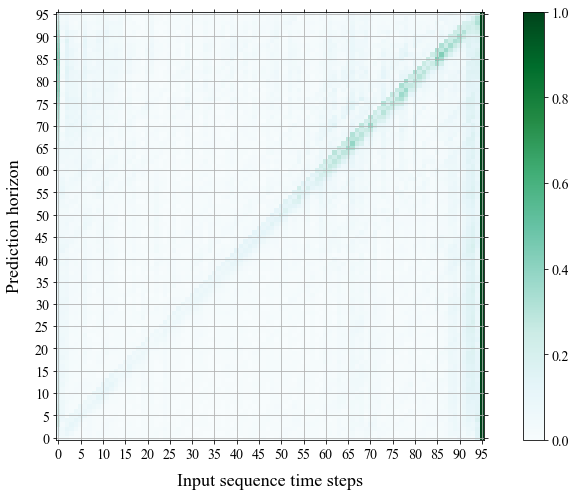

Arg use_gpu initial: True
Args in experiment:
Namespace(activation='gelu', batch_size=16, c_out=21, checkpoints='\\checkpoints', d_ff=2048, d_layers=1, d_model=512, data='custom', data_path='weather.csv', dec_in=7, des='Exp', devices='0,1,2,3', distil=True, do_predict=False, dropout=0.05, e_layers=2, embed='timeF', embed_type=0, enc_in=21, factor=1, features='M', freq='h', gpu=0, individual=True, is_training=1, itr=1, label_len=48, learning_rate=0.005, loss='mse', lradj='type1', model='DLinear', model_id='weather_96_96', moving_avg=25, n_heads=8, num_workers=0, output_attention=False, patience=5, pred_len=96, root_path='./dataset/', save_pred_values=False, seed=10458, seq_len=96, target='OT', test_flop=False, train_epochs=20, train_only=False, use_amp=False, use_gpu=True, use_multi_gpu=False)
Use GPU: cuda:0
checkpoints/weather_96_96_DLinear_custom_ftM_sl96_ll48_pl96_dm512_nh8_el2_dl1_df2048_fc1_ebtimeF_dtTrue_Exp_0_seed10458/checkpoint.pth
pred 1
Input/output mode
accum_signals.shape 

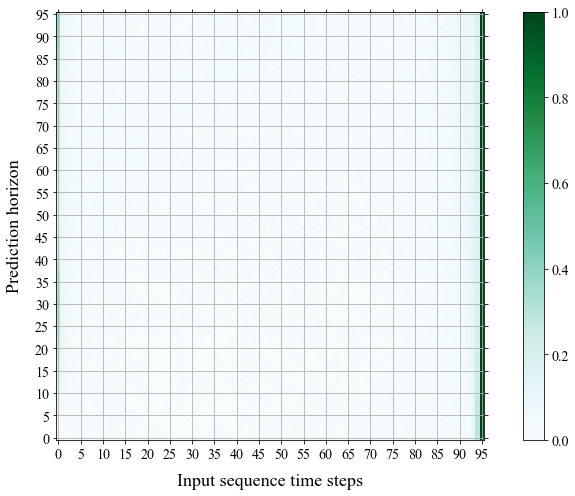

Arg use_gpu initial: True
Args in experiment:
Namespace(activation='gelu', batch_size=8, c_out=7, checkpoints='\\checkpoints', d_ff=2048, d_layers=1, d_model=512, data='custom', data_path='national_illness.csv', dec_in=7, des='Exp', devices='0,1,2,3', distil=True, do_predict=False, dropout=0.05, e_layers=2, embed='timeF', embed_type=0, enc_in=7, factor=1, features='M', freq='h', gpu=0, individual=True, is_training=1, itr=1, label_len=18, learning_rate=0.0005, loss='mse', lradj='type1', model='DLinear', model_id='national_illness_36_36', moving_avg=25, n_heads=8, num_workers=0, output_attention=False, patience=5, pred_len=36, root_path='./dataset/', save_pred_values=False, seed=32598, seq_len=36, target='OT', test_flop=False, train_epochs=20, train_only=False, use_amp=False, use_gpu=True, use_multi_gpu=False)
Use GPU: cuda:0
checkpoints/national_illness_36_36_DLinear_custom_ftM_sl36_ll18_pl36_dm512_nh8_el2_dl1_df2048_fc1_ebtimeF_dtTrue_Exp_0_seed32598/checkpoint.pth
pred 1
Input/output 

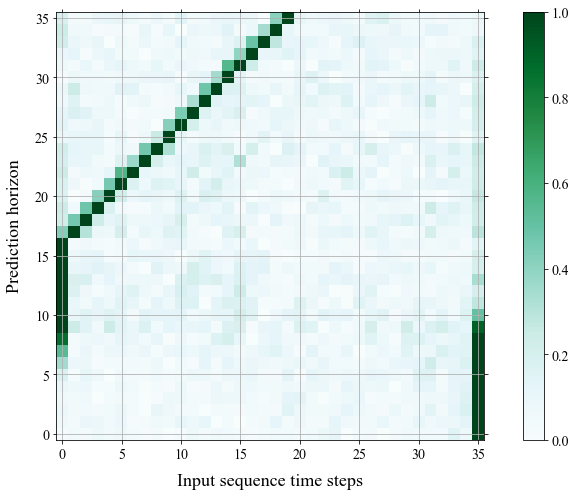

In [5]:
# DLinear
for dataset_key in ["exchange_rate", "ETTh1", "ETTh2", "ETTm1", "ETTm2", "weather", "national_illness"]:
    exp, model, setting = load_model(dl_model_args[dataset_key], load=True, return_copy=False)
    pred_data, pred_loader = exp._get_data("pred")

#     Load some params needed to identify saved explanations
    if dataset_key == "national_illness":
        num_train_samples = 576
    else:
        num_train_samples = 50
    
    feature_list = []
    for i in range(exp.args.c_out*exp.args.seq_len):
        feature_list.append("Feature {}, seq pos {} ".format(pred_data.cols[1:][i%exp.args.c_out], int(i/exp.args.c_out)))
    
#     Load saved shap-based explanations
    with open("Explanations/SHAP/shap_values_{}_in_{}_out_{}_{}_bg_{}.pkl".format(dataset_key, exp.args.seq_len, exp.args.pred_len, exp.args.model, num_train_samples), 'rb') as file:
        reduced_deep_shap_values = pickle.load(file)
        
    custom_cycler = (cycler(color=plt.rcParams['axes.prop_cycle'].by_key()['color'][:8]) + 
                 cycler(linestyle=['dotted', 'dashed', 'dashdot', (0, (3, 5, 1, 5, 1, 5)), 
                                   (5, (10, 3)), (0, (5, 10)), (0, (5, 5)), (0, (5, 1))]))
    plt.rc('axes', prop_cycle=custom_cycler)

    pred_hor = 0
    out_feat = 0
    mode = 1
    path = "figures"
    fig_name = "\\shap_overview_{}_in_{}_out_{}_{}_bg_{}.pdf".format(dataset_key, exp.args.seq_len, exp.args.pred_len, exp.args.model, num_train_samples)
    figsize = (11,7)
    save = 1

    ChronoSHAP(reduced_deep_shap_values, exp.args.seq_len, 
                           exp.args.c_out, pred_data.cols[1:], mode, pred_hor, out_feat, grid=1, save=save, path=path+fig_name, figsize=figsize)



Arg use_gpu initial: False
Args in experiment:
Namespace(activation='gelu', batch_size=8, c_out=8, checkpoints='\\checkpoints', d_ff=2048, d_layers=1, d_model=512, data='custom', data_path='exchange_rate.csv', dec_in=7, des='Exp', devices='0,1,2,3', distil=True, do_predict=False, dropout=0.05, e_layers=2, embed='timeF', embed_type=0, enc_in=8, factor=1, features='M', freq='h', gpu=0, individual=True, is_training=1, itr=1, label_len=48, learning_rate=0.0005, loss='mse', lradj='type1', model='NLinear', model_id='exchange_96_96', moving_avg=25, n_heads=8, num_workers=0, output_attention=False, patience=5, pred_len=96, root_path='./dataset/', save_pred_values=False, seed=15349, seq_len=96, target='OT', test_flop=False, train_epochs=20, train_only=False, use_amp=False, use_gpu=False, use_multi_gpu=False)
Use CPU
checkpoints/exchange_96_96_NLinear_custom_ftM_sl96_ll48_pl96_dm512_nh8_el2_dl1_df2048_fc1_ebtimeF_dtTrue_Exp_0_seed15349/checkpoint.pth
pred 1
Input/output mode
accum_signals.shape 

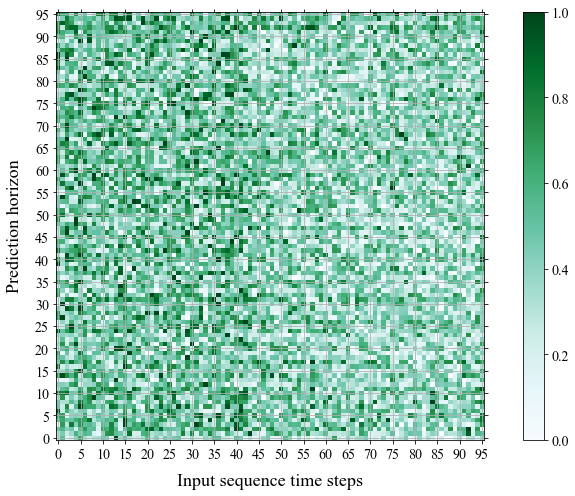

Arg use_gpu initial: False
Args in experiment:
Namespace(activation='gelu', batch_size=8, c_out=7, checkpoints='\\checkpoints', d_ff=2048, d_layers=1, d_model=512, data='ETTh1', data_path='ETTh1.csv', dec_in=7, des='Exp', devices='0,1,2,3', distil=True, do_predict=False, dropout=0.05, e_layers=2, embed='timeF', embed_type=0, enc_in=7, factor=1, features='M', freq='h', gpu=0, individual=True, is_training=1, itr=1, label_len=48, learning_rate=0.0005, loss='mse', lradj='type1', model='NLinear', model_id='ETTh1_96_96', moving_avg=25, n_heads=8, num_workers=0, output_attention=False, patience=5, pred_len=96, root_path='./dataset/', save_pred_values=False, seed=15726, seq_len=96, target='OT', test_flop=False, train_epochs=20, train_only=False, use_amp=False, use_gpu=False, use_multi_gpu=False)
Use CPU
checkpoints/ETTh1_96_96_NLinear_ETTh1_ftM_sl96_ll48_pl96_dm512_nh8_el2_dl1_df2048_fc1_ebtimeF_dtTrue_Exp_0_seed15726/checkpoint.pth
pred 1
Input/output mode
accum_signals.shape (96, 96)


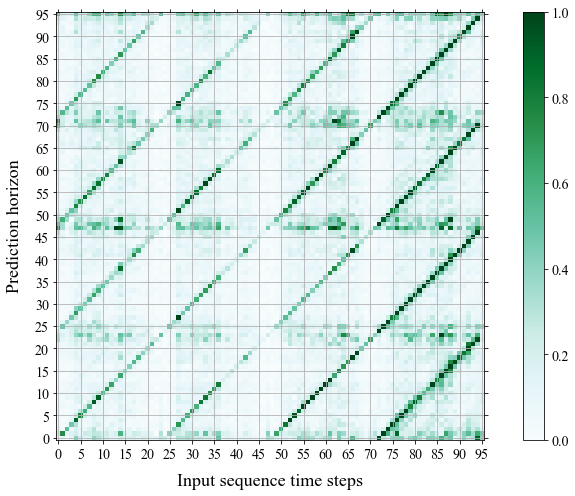

Arg use_gpu initial: False
Args in experiment:
Namespace(activation='gelu', batch_size=8, c_out=7, checkpoints='\\checkpoints', d_ff=2048, d_layers=1, d_model=512, data='ETTh2', data_path='ETTh2.csv', dec_in=7, des='Exp', devices='0,1,2,3', distil=True, do_predict=False, dropout=0.05, e_layers=2, embed='timeF', embed_type=0, enc_in=7, factor=1, features='M', freq='h', gpu=0, individual=True, is_training=1, itr=1, label_len=48, learning_rate=0.0005, loss='mse', lradj='type1', model='NLinear', model_id='ETTh2_96_96', moving_avg=25, n_heads=8, num_workers=0, output_attention=False, patience=5, pred_len=96, root_path='./dataset/', save_pred_values=False, seed=15349, seq_len=96, target='OT', test_flop=False, train_epochs=20, train_only=False, use_amp=False, use_gpu=False, use_multi_gpu=False)
Use CPU
checkpoints/ETTh2_96_96_NLinear_ETTh2_ftM_sl96_ll48_pl96_dm512_nh8_el2_dl1_df2048_fc1_ebtimeF_dtTrue_Exp_0_seed15349/checkpoint.pth
pred 1
Input/output mode
accum_signals.shape (96, 96)


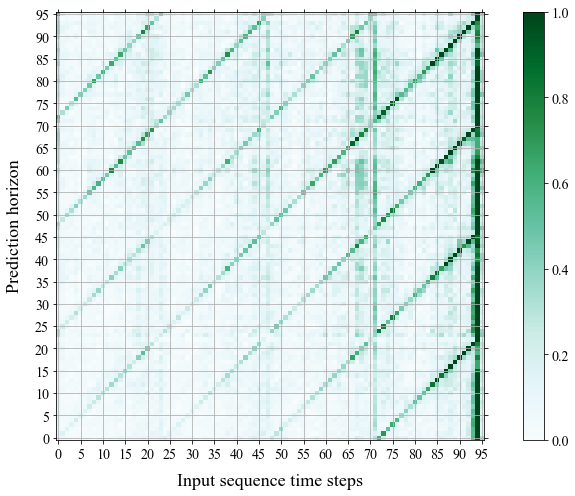

Arg use_gpu initial: False
Args in experiment:
Namespace(activation='gelu', batch_size=8, c_out=7, checkpoints='\\checkpoints', d_ff=2048, d_layers=1, d_model=512, data='ETTm1', data_path='ETTm1.csv', dec_in=7, des='Exp', devices='0,1,2,3', distil=True, do_predict=False, dropout=0.05, e_layers=2, embed='timeF', embed_type=0, enc_in=7, factor=1, features='M', freq='h', gpu=0, individual=True, is_training=1, itr=1, label_len=48, learning_rate=0.0005, loss='mse', lradj='type1', model='NLinear', model_id='ETTm1_96_96', moving_avg=25, n_heads=8, num_workers=0, output_attention=False, patience=5, pred_len=96, root_path='./dataset/', save_pred_values=False, seed=15349, seq_len=96, target='OT', test_flop=False, train_epochs=20, train_only=False, use_amp=False, use_gpu=False, use_multi_gpu=False)
Use CPU
checkpoints/ETTm1_96_96_NLinear_ETTm1_ftM_sl96_ll48_pl96_dm512_nh8_el2_dl1_df2048_fc1_ebtimeF_dtTrue_Exp_0_seed15349/checkpoint.pth
pred 1
Input/output mode
accum_signals.shape (96, 96)


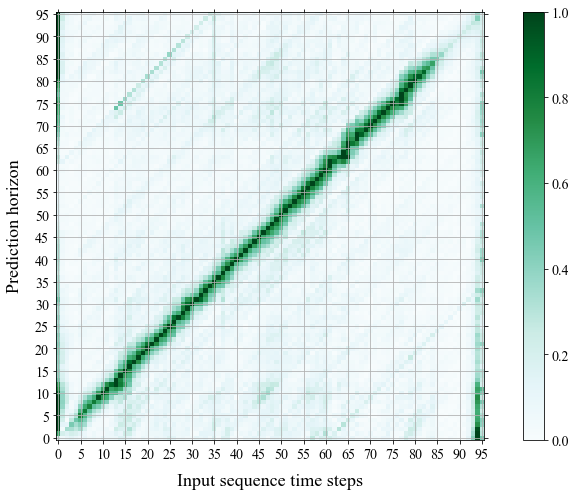

Arg use_gpu initial: False
Args in experiment:
Namespace(activation='gelu', batch_size=8, c_out=7, checkpoints='\\checkpoints', d_ff=2048, d_layers=1, d_model=512, data='ETTm2', data_path='ETTm2.csv', dec_in=7, des='Exp', devices='0,1,2,3', distil=True, do_predict=False, dropout=0.05, e_layers=2, embed='timeF', embed_type=0, enc_in=7, factor=1, features='M', freq='h', gpu=0, individual=True, is_training=1, itr=1, label_len=48, learning_rate=0.0005, loss='mse', lradj='type1', model='NLinear', model_id='ETTm2_96_96', moving_avg=25, n_heads=8, num_workers=0, output_attention=False, patience=5, pred_len=96, root_path='./dataset/', save_pred_values=False, seed=15227, seq_len=96, target='OT', test_flop=False, train_epochs=20, train_only=False, use_amp=False, use_gpu=False, use_multi_gpu=False)
Use CPU
checkpoints/ETTm2_96_96_NLinear_ETTm2_ftM_sl96_ll48_pl96_dm512_nh8_el2_dl1_df2048_fc1_ebtimeF_dtTrue_Exp_0_seed15227/checkpoint.pth
pred 1
Input/output mode
accum_signals.shape (96, 96)


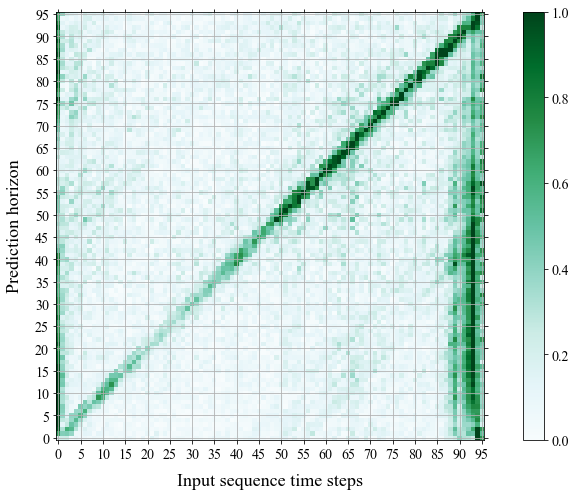

Arg use_gpu initial: True
Args in experiment:
Namespace(activation='gelu', batch_size=16, c_out=21, checkpoints='\\checkpoints', d_ff=2048, d_layers=1, d_model=512, data='custom', data_path='weather.csv', dec_in=7, des='Exp', devices='0,1,2,3', distil=True, do_predict=False, dropout=0.05, e_layers=2, embed='timeF', embed_type=0, enc_in=21, factor=1, features='M', freq='h', gpu=0, individual=True, is_training=1, itr=1, label_len=48, learning_rate=0.005, loss='mse', lradj='type1', model='NLinear', model_id='weather_96_96', moving_avg=25, n_heads=8, num_workers=0, output_attention=False, patience=5, pred_len=96, root_path='./dataset/', save_pred_values=False, seed=15349, seq_len=96, target='OT', test_flop=False, train_epochs=20, train_only=False, use_amp=False, use_gpu=True, use_multi_gpu=False)
Use GPU: cuda:0
checkpoints/weather_96_96_NLinear_custom_ftM_sl96_ll48_pl96_dm512_nh8_el2_dl1_df2048_fc1_ebtimeF_dtTrue_Exp_0_seed15349/checkpoint.pth
pred 1
Input/output mode
accum_signals.shape 

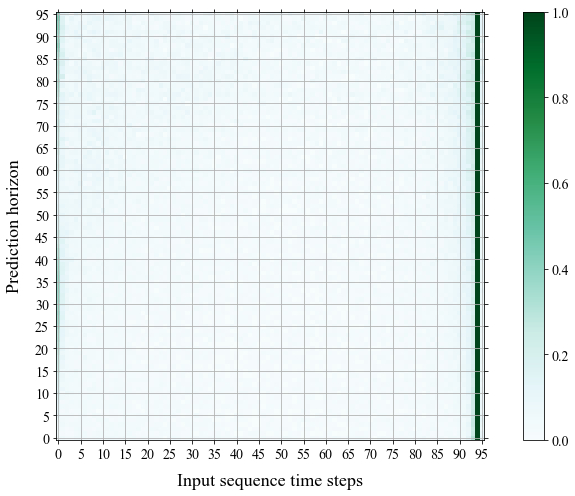

Arg use_gpu initial: True
Args in experiment:
Namespace(activation='gelu', batch_size=8, c_out=7, checkpoints='\\checkpoints', d_ff=2048, d_layers=1, d_model=512, data='custom', data_path='national_illness.csv', dec_in=7, des='Exp', devices='0,1,2,3', distil=True, do_predict=False, dropout=0.05, e_layers=2, embed='timeF', embed_type=0, enc_in=7, factor=1, features='M', freq='h', gpu=0, individual=True, is_training=1, itr=1, label_len=18, learning_rate=0.0005, loss='mse', lradj='type1', model='NLinear', model_id='national_illness_36_36', moving_avg=25, n_heads=8, num_workers=0, output_attention=False, patience=5, pred_len=36, root_path='./dataset/', save_pred_values=False, seed=28649, seq_len=36, target='OT', test_flop=False, train_epochs=20, train_only=False, use_amp=False, use_gpu=True, use_multi_gpu=False)
Use GPU: cuda:0
checkpoints/national_illness_36_36_NLinear_custom_ftM_sl36_ll18_pl36_dm512_nh8_el2_dl1_df2048_fc1_ebtimeF_dtTrue_Exp_0_seed28649/checkpoint.pth
pred 1
Input/output 

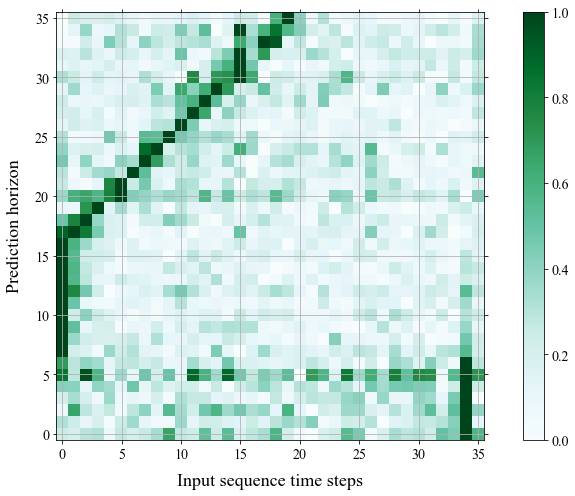

In [6]:
# NLinear
for dataset_key in ["exchange_rate", "ETTh1", "ETTh2", "ETTm1", "ETTm2", "weather", "national_illness"]:
    exp, model, setting = load_model(nl_model_args[dataset_key], load=True, return_copy=False)
    pred_data, pred_loader = exp._get_data("pred")

#     Load some params needed to identify saved explanations
    if dataset_key == "national_illness":
        num_train_samples = 576
    else:
        num_train_samples = 50
    
    feature_list = []
    for i in range(exp.args.c_out*exp.args.seq_len):
        feature_list.append("Feature {}, seq pos {} ".format(pred_data.cols[1:][i%exp.args.c_out], int(i/exp.args.c_out)))
    
#     Load saved shap-based explanations
    with open("Explanations/SHAP/shap_values_{}_in_{}_out_{}_{}_bg_{}.pkl".format(dataset_key, exp.args.seq_len, exp.args.pred_len, exp.args.model, num_train_samples), 'rb') as file:
        reduced_deep_shap_values = pickle.load(file)
        
    custom_cycler = (cycler(color=plt.rcParams['axes.prop_cycle'].by_key()['color'][:8]) + 
                 cycler(linestyle=['dotted', 'dashed', 'dashdot', (0, (3, 5, 1, 5, 1, 5)), 
                                   (5, (10, 3)), (0, (5, 10)), (0, (5, 5)), (0, (5, 1))]))
    plt.rc('axes', prop_cycle=custom_cycler)

    pred_hor = 0
    out_feat = 0
    mode = 1
    path = "figures"
    fig_name = "\\shap_overview_{}_in_{}_out_{}_{}_bg_{}.pdf".format(dataset_key, exp.args.seq_len, exp.args.pred_len, exp.args.model, num_train_samples)
    figsize = (11,7)
    save = 1

    ChronoSHAP(reduced_deep_shap_values, exp.args.seq_len, 
                           exp.args.c_out, pred_data.cols[1:], mode, pred_hor, out_feat, grid=1, save=save, path=path+fig_name, figsize=figsize)

